# EDA and Survival Prediction on Titanic Dataset 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import seaborn as sns 

# Loading the Dataset 

In [3]:
titanic = pd.read_csv('train.csv')

# Understanding the DataSet

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

In [6]:
type('titanic')

str

## Checking for the null values

In [7]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

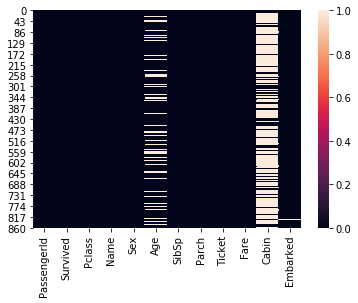

In [10]:
sns.heatmap(titanic.isnull())

##### Null values are present in Age and Cabin columns

# Visulazing the Data with Seaborn Plots

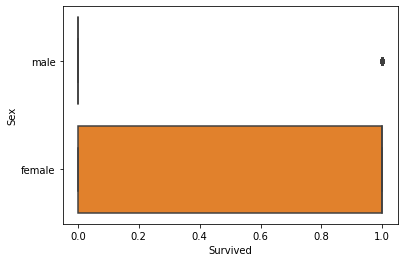

In [11]:
sns.boxplot(x="Survived", y="Sex", data=titanic)

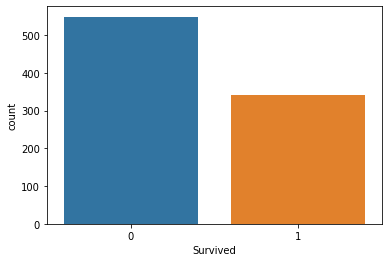

In [12]:
sns.countplot(x="Survived", data=titanic)

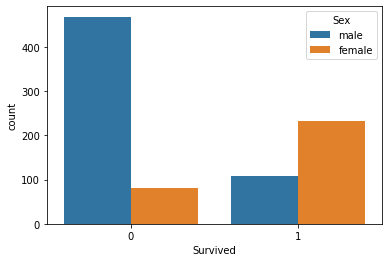

In [13]:
sns.countplot(x='Survived', hue= 'Sex', data=titanic)

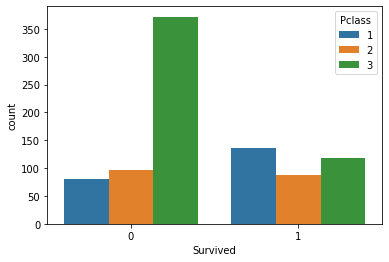

In [14]:
sns.countplot(x='Survived', hue = 'Pclass', data=titanic)

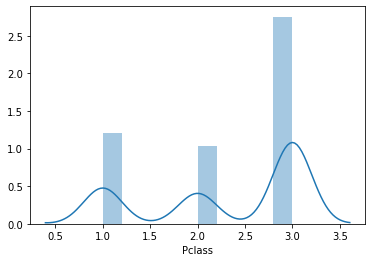

In [15]:
sns.distplot(titanic['Pclass'])

In [16]:
type('Age')

str

# Dealing with Missing values

### Dropping the null values from the Age column

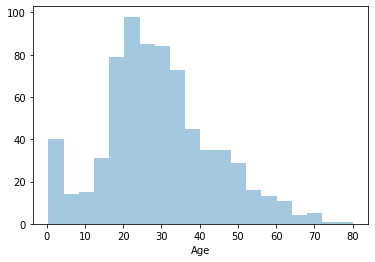

In [17]:
sns.distplot(titanic['Age'].dropna(), kde=False)

In [18]:
type(titanic['Age'].dropna())

pandas.core.series.Series

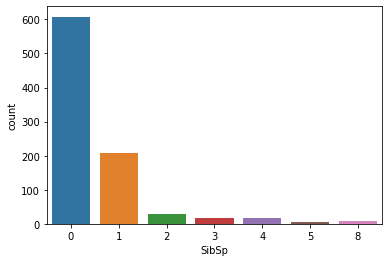

In [19]:
sns.countplot(x = 'SibSp', data = titanic)

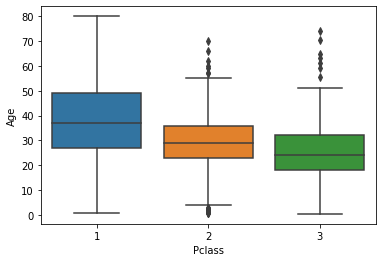

In [20]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

In [21]:

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [22]:
titanic['Age'] = titanic[['Pclass', 'Age']].apply(impute_age, axis =1)

In [23]:
titanic['Age']

0      3.0
1      1.0
2      3.0
3      1.0
4      3.0
      ... 
886    2.0
887    1.0
888    3.0
889    1.0
890    3.0
Name: Age, Length: 891, dtype: float64

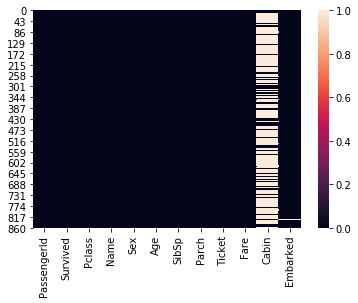

In [24]:
sns.heatmap(titanic.isnull())

In [25]:
titanic.drop("Cabin", axis =1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,3.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,2.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,1.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,3.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,1.0,0,0,111369,30.0000,C


In [26]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,3.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S


## Dropping the  Cabin Column as we dont require Cabin column which is not an important feature for our predictions

In [28]:
titanic.drop("Cabin", axis =1,inplace=True)

In [29]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,3.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,2.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,1.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,3.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,1.0,0,0,111369,30.0000,C


In [30]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [31]:
titanic.dropna(inplace = True)

In [32]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### Creating Dummy values for columns "Embarked" and "Sex"

In [34]:
pd.get_dummies(titanic['Embarked'],drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [35]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)


In [36]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [37]:
embarked = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [38]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [39]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [40]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,3.0,1,0,7.2500
1,2,1,1,1.0,1,0,71.2833
2,3,1,3,3.0,0,0,7.9250
3,4,1,1,1.0,1,0,53.1000
4,5,0,3,3.0,0,0,8.0500


In [41]:
titanic = pd.concat([titanic,sex,embarked],axis=1)

In [42]:
titanic.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,3.0,1,0,7.2500,1,0,1
1,2,1,1.0,1,0,71.2833,0,0,0
2,3,3,3.0,0,0,7.9250,0,0,1
3,4,1,1.0,1,0,53.1000,0,0,1
4,5,3,3.0,0,0,8.0500,1,0,1


In [43]:
X = titanic.drop('Survived',axis=1)

In [44]:
X 

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,3.0,1,0,7.2500,1,0,1
1,2,1,1.0,1,0,71.2833,0,0,0
2,3,3,3.0,0,0,7.9250,0,0,1
3,4,1,1.0,1,0,53.1000,0,0,1
4,5,3,3.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,2.0,0,0,13.0000,1,0,1
887,888,1,1.0,0,0,30.0000,0,0,1
888,889,3,3.0,1,2,23.4500,0,0,1
889,890,1,1.0,0,0,30.0000,1,0,0


In [45]:
y = titanic['Survived']

In [46]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Splitting the data into Train and Test set for model predicition 70:30

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=101)


# Model Training and Prediction Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train) #training our model

C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictions = logmodel.predict(X_test) #predicting on test set 

# Confusion Matrix to check our accuracy done by Logistic Regression 

In [52]:

from sklearn.metrics import confusion_matrix

In [53]:
accuracy=confusion_matrix(y_test,predictions)

In [54]:
accuracy

array([[152,  11],
       [ 36,  68]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
LGR=accuracy_score(y_test,predictions)
accuracy

array([[152,  11],
       [ 36,  68]], dtype=int64)

In [57]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       163
           1       0.86      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.83      0.82      0.82       267



# Training our model with SVM classifier 

In [60]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [61]:
y_pred = classifier.predict(X_test)

In [62]:
cm = confusion_matrix(y_test, y_pred)

In [63]:
cm

array([[143,  20],
       [ 36,  68]], dtype=int64)

In [64]:
SVM = accuracy_score(y_test,y_pred)
SVM

0.7902621722846442

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       163
           1       0.77      0.65      0.71       104

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



# Training our model with KNN classifier 
### Scaling our data 

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [68]:
y_pred1 = classifier.predict(X_test)

In [69]:
y_pred1

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [70]:
cm = confusion_matrix(y_test, y_pred1)

In [71]:
cm

array([[144,  19],
       [ 35,  69]], dtype=int64)

In [72]:
KNN=accuracy_score(y_test, y_pred1)
KNN

0.797752808988764

In [73]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       163
           1       0.78      0.66      0.72       104

    accuracy                           0.80       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



# Training our model with RandomForest classifier 

In [74]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [75]:
y_pred2 = classifier.predict(X_test)

In [76]:
y_pred2

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [77]:
cm = confusion_matrix(y_test, y_pred2)
cm

array([[151,  12],
       [ 43,  61]], dtype=int64)

In [78]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       163
           1       0.84      0.59      0.69       104

    accuracy                           0.79       267
   macro avg       0.81      0.76      0.77       267
weighted avg       0.80      0.79      0.78       267



In [79]:
RFC=accuracy_score(y_test, y_pred2)
RFC

0.7940074906367042

# Training our model with Decision Tree classifier 

In [80]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [81]:
y_pred3 = classifier.predict(X_test)

In [82]:
cm = confusion_matrix(y_test, y_pred3)
cm

array([[135,  28],
       [ 41,  63]], dtype=int64)

In [83]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       163
           1       0.69      0.61      0.65       104

    accuracy                           0.74       267
   macro avg       0.73      0.72      0.72       267
weighted avg       0.74      0.74      0.74       267



In [84]:
DTC=accuracy_score(y_test, y_pred3)
DTC

0.7415730337078652

# Training our model with Naive Bayes classifier 

In [85]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
y_pred4 = classifier.predict(X_test)

In [87]:
cm = confusion_matrix(y_test, y_pred4)

In [88]:
cm

array([[136,  27],
       [ 32,  72]], dtype=int64)

In [89]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       163
           1       0.73      0.69      0.71       104

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267



In [90]:
NBC=accuracy_score(y_test, y_pred4)
NBC

0.7790262172284644

In [91]:
print(NBC)

0.7790262172284644


In [92]:
(NBC)

0.7790262172284644

# Checking the predictions 

In [93]:
output = pd.DataFrame({'Method':['Logistic Regression','Support Vector Machine','K-NN','Decision Tree Classifier','Random Forest Regressor','Naive Bayes'],
                      'Accuracy': [LGR,SVM,KNN,DTC,RFC,NBC]})
output

,Method,Accuracy
0,Logistic Regression,0.823970
1,Support Vector Machine,0.790262
2,K-NN,0.797753
3,Decision Tree Classifier,0.741573
4,Random Forest Regressor,0.794007
5,Naive Bayes,0.779026


# out of all Logistic Regression gives us the best preciction

Will be trying our predicitions using boosting in next code